In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Load Part 2
data_part2 = np.load("mnist_split_data/mnist_part2.npz")
x_train = data_part2['x_train']
y_train = data_part2['y_train']
x_test = data_part2['x_test']
y_test = data_part2['y_test']

In [4]:
len(x_train)

29999

In [5]:
len(x_test)

5001

In [6]:
x_train.shape

(29999, 28, 28)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

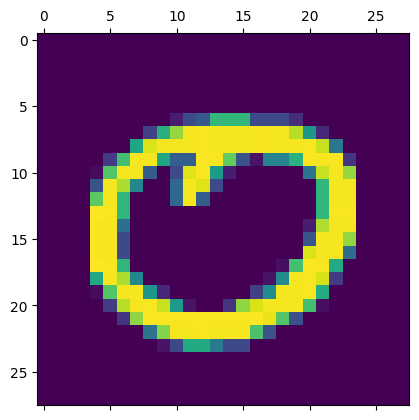

In [ ]:
plt.matshow(x_train[4])

In [9]:
y_train[4]

np.uint8(0)

Scaling the dataset by dividing with 255

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flatten.shape


(29999, 784)

In [13]:
x_test_flatten.shape

(5001, 784)

In [14]:
x_train_flatten[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [15]:
# Improved Model with Multiple Hidden Layers and Optimizations
model = keras.Sequential([
    # First hidden layer - Feature extraction
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),
    keras.layers.Dropout(0.2),  # Prevent overfitting
    
    # Second hidden layer - Pattern recognition
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    # Third hidden layer - Feature refinement
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.1),
    
    # Output layer - Classification
    keras.layers.Dense(10, activation="softmax")  # Changed to softmax for multi-class
])

# Compile with optimized parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimized learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model architecture
model.summary()

# Train with improved parameters
history = model.fit(
    x_train_flatten, y_train,
    epochs=0,           # More epochs for better learning
    batch_size=128,      # Optimal batch size
    validation_split=0.2, # Monitor overfitting
    verbose=1
)

D:\amrita intern\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

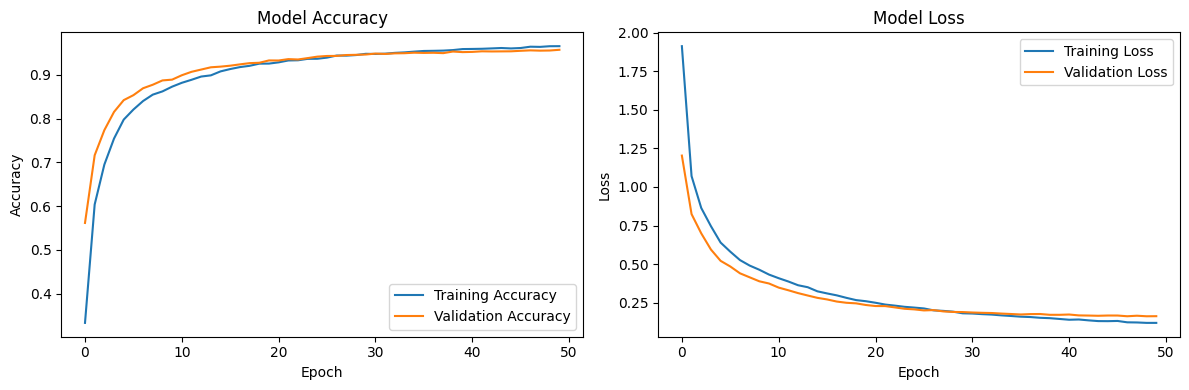

In [15]:
# Visualize training progress
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Accuracy: 0.1004
Test Loss: 2.3026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


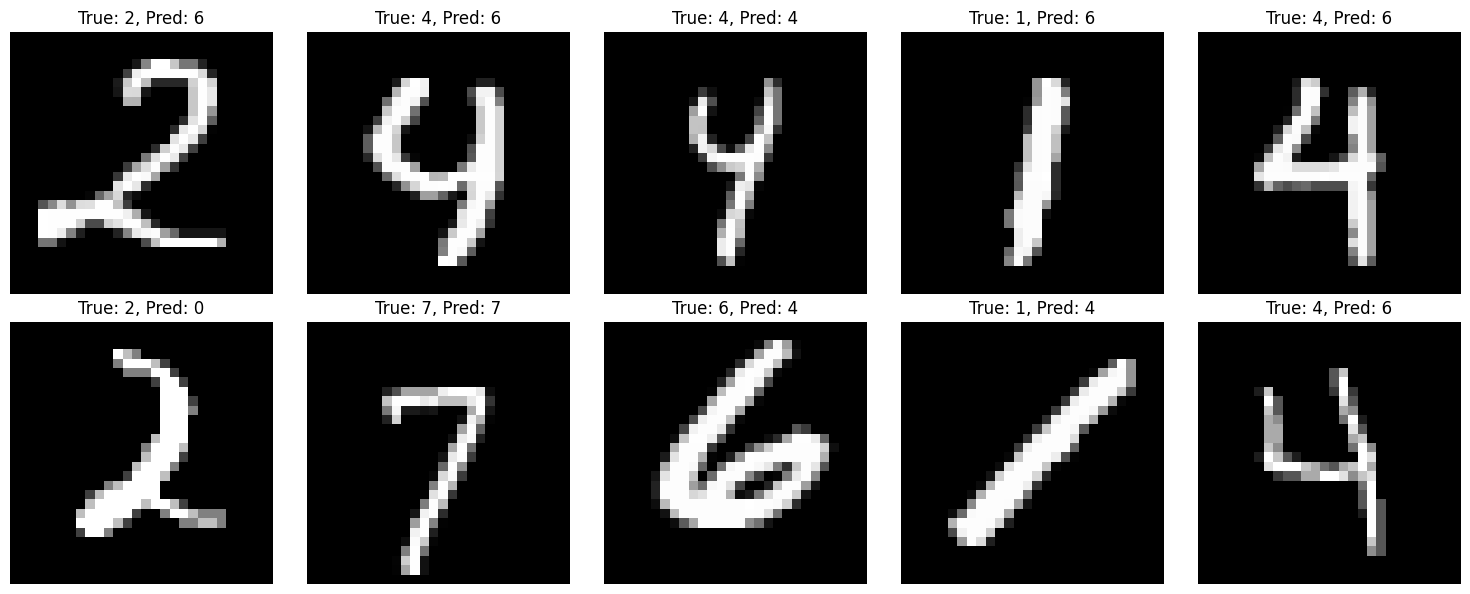

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_flatten, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions and show some examples
predictions = model.predict(x_test_flatten[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Display some test images with predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
model.save('mnist_model2.h5') 